___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [59]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [61]:
df.shape

(10000, 14)

In [62]:
df.isnull().sum().any()

False

In [63]:
df.duplicated().sum()

0

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


<AxesSubplot:>

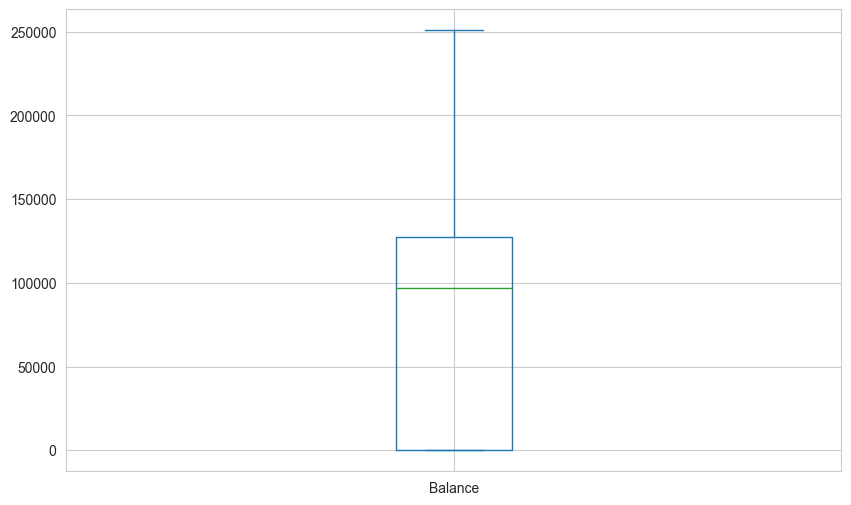

In [65]:
df.Balance.plot(kind="box")

In [66]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [67]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

0    7963
1    2037
Name: Exited, dtype: int64


<AxesSubplot:xlabel='Exited', ylabel='count'>

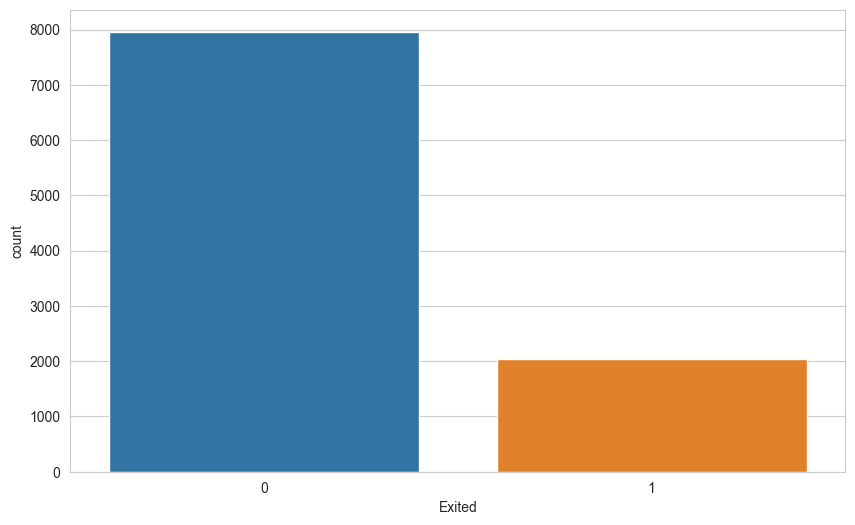

In [68]:
print(df.Exited.value_counts())
sns.countplot(df["Exited"])

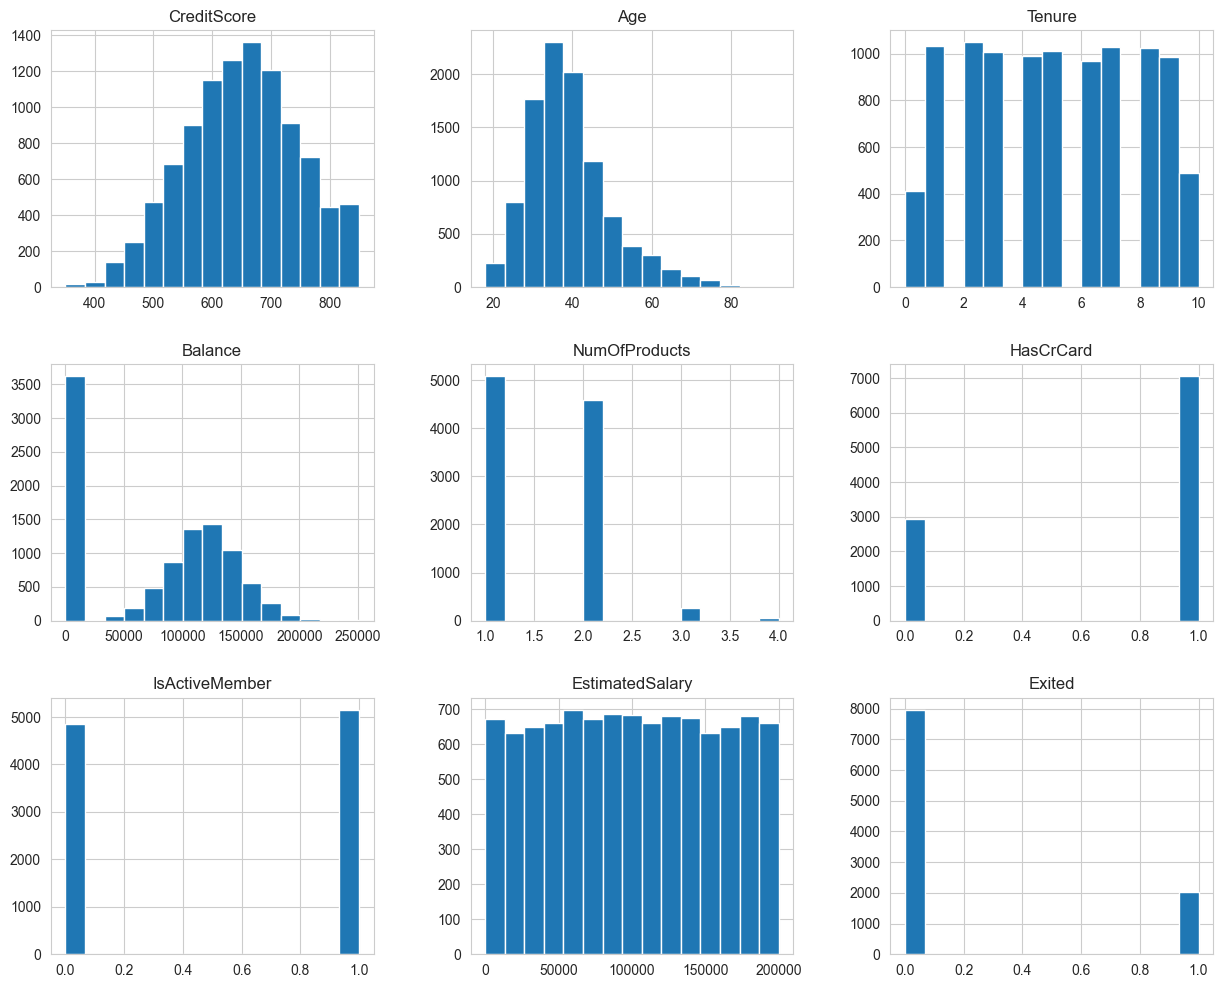

In [69]:
df.hist(figsize=(15, 12), bins=15);

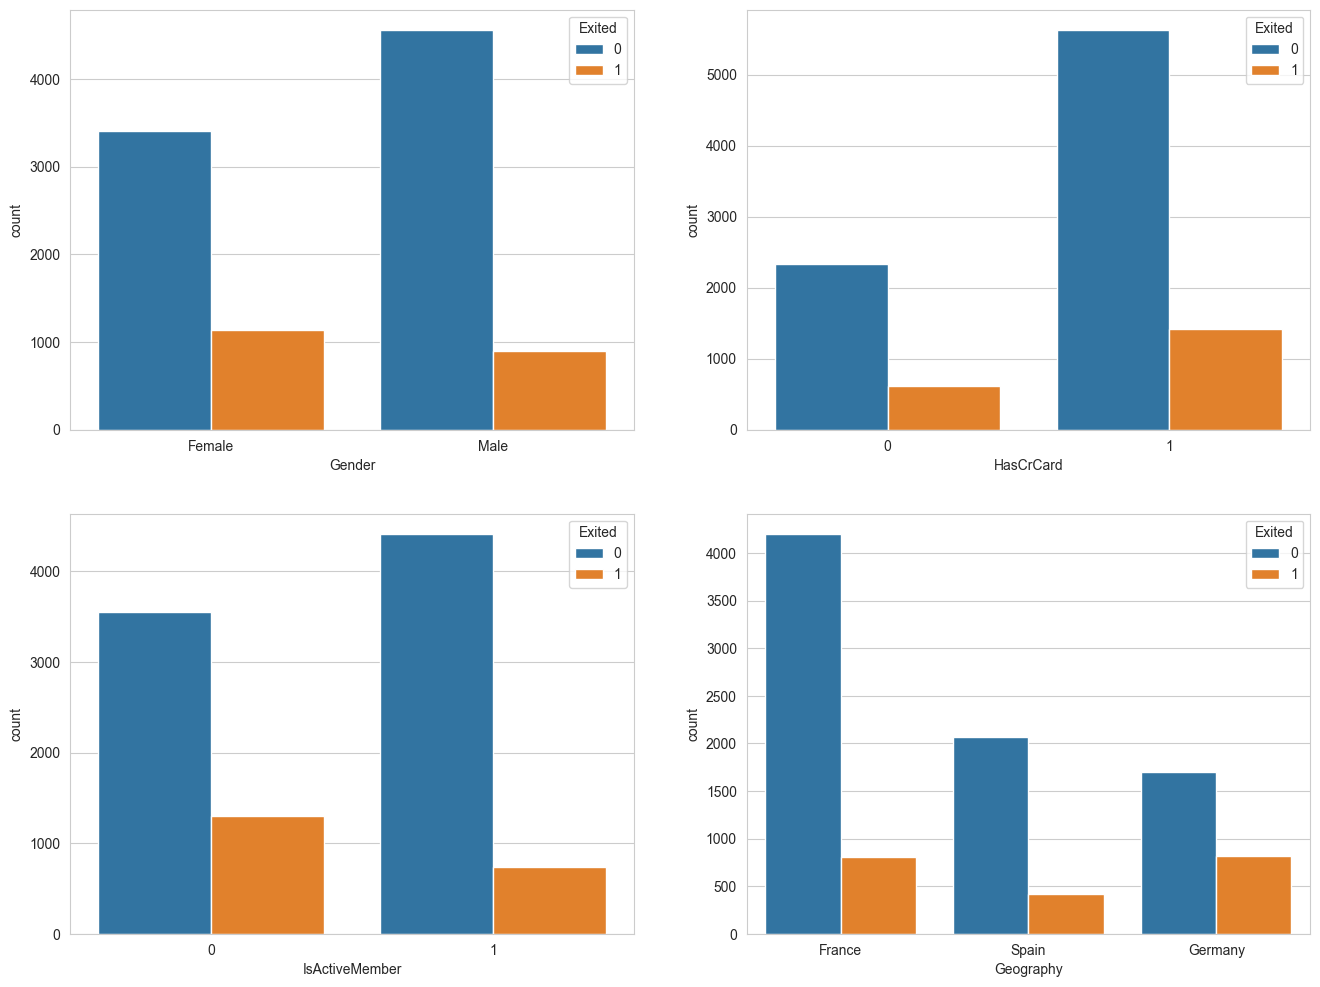

In [70]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index=0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=df, x=i, hue="Exited")

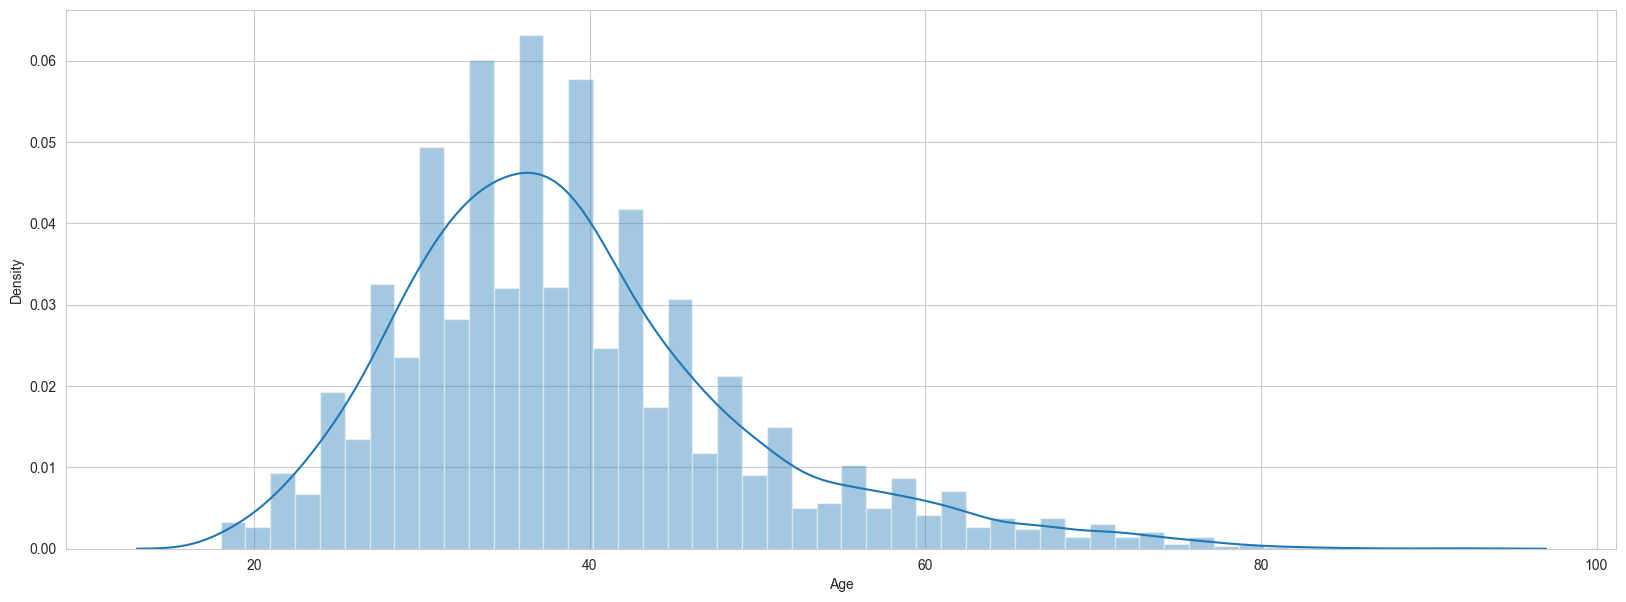

In [71]:
plt.figure(figsize=(20, 7))
sns.distplot(df.Age);

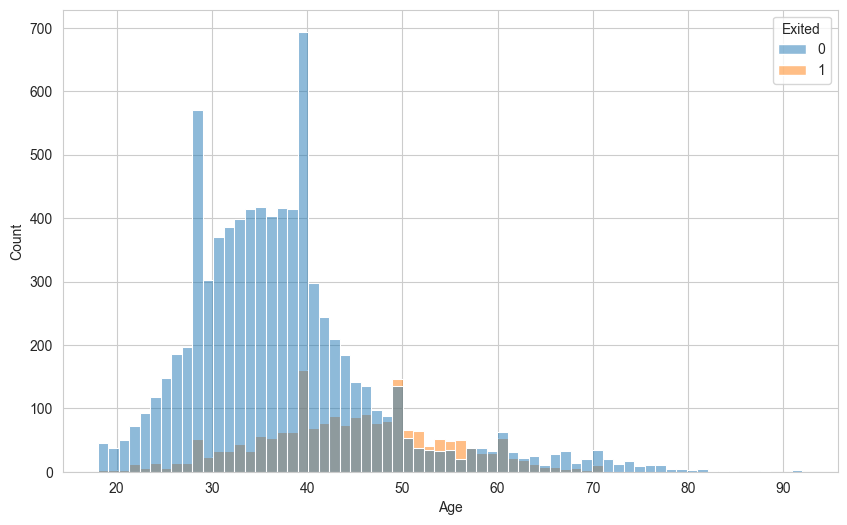

In [72]:
sns.histplot(data = df, x = "Age", hue="Exited", fill=True);

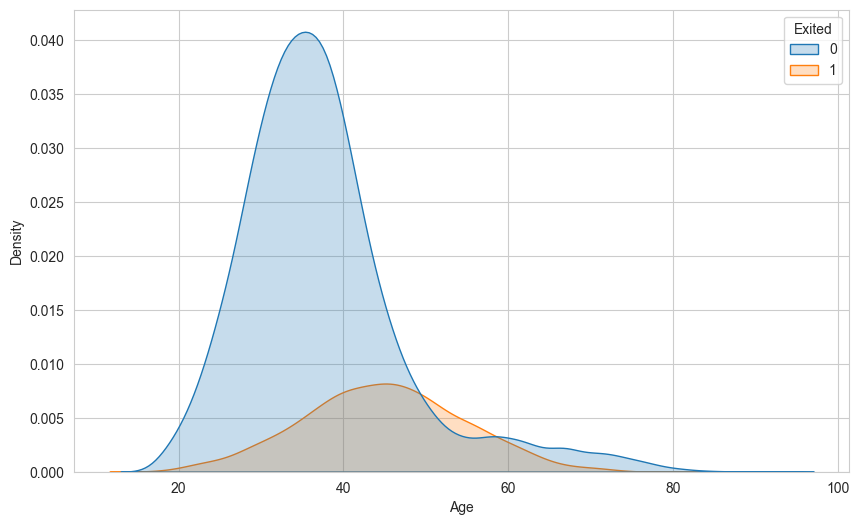

In [73]:
sns.kdeplot(data = df, x = "Age", hue="Exited", fill=True);

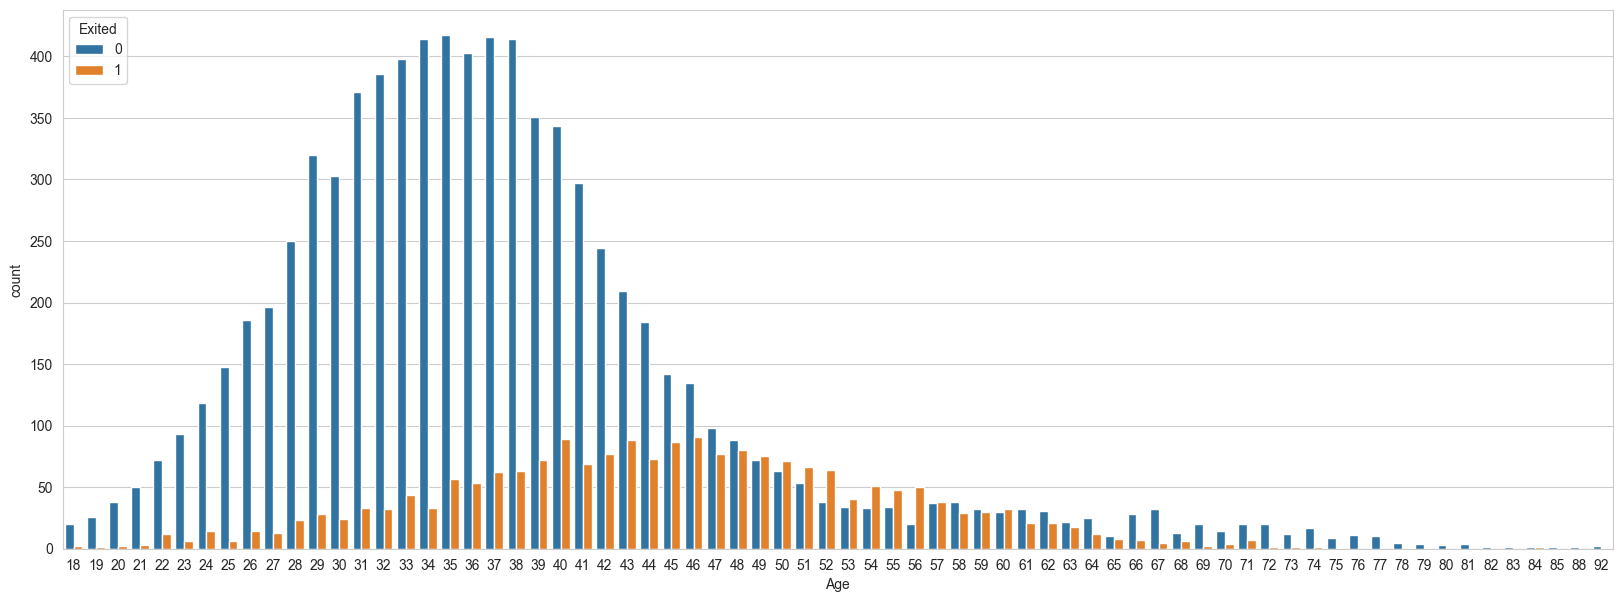

In [74]:
plt.figure(figsize=(20, 7))
sns.countplot(df.Age, hue=df.Exited);

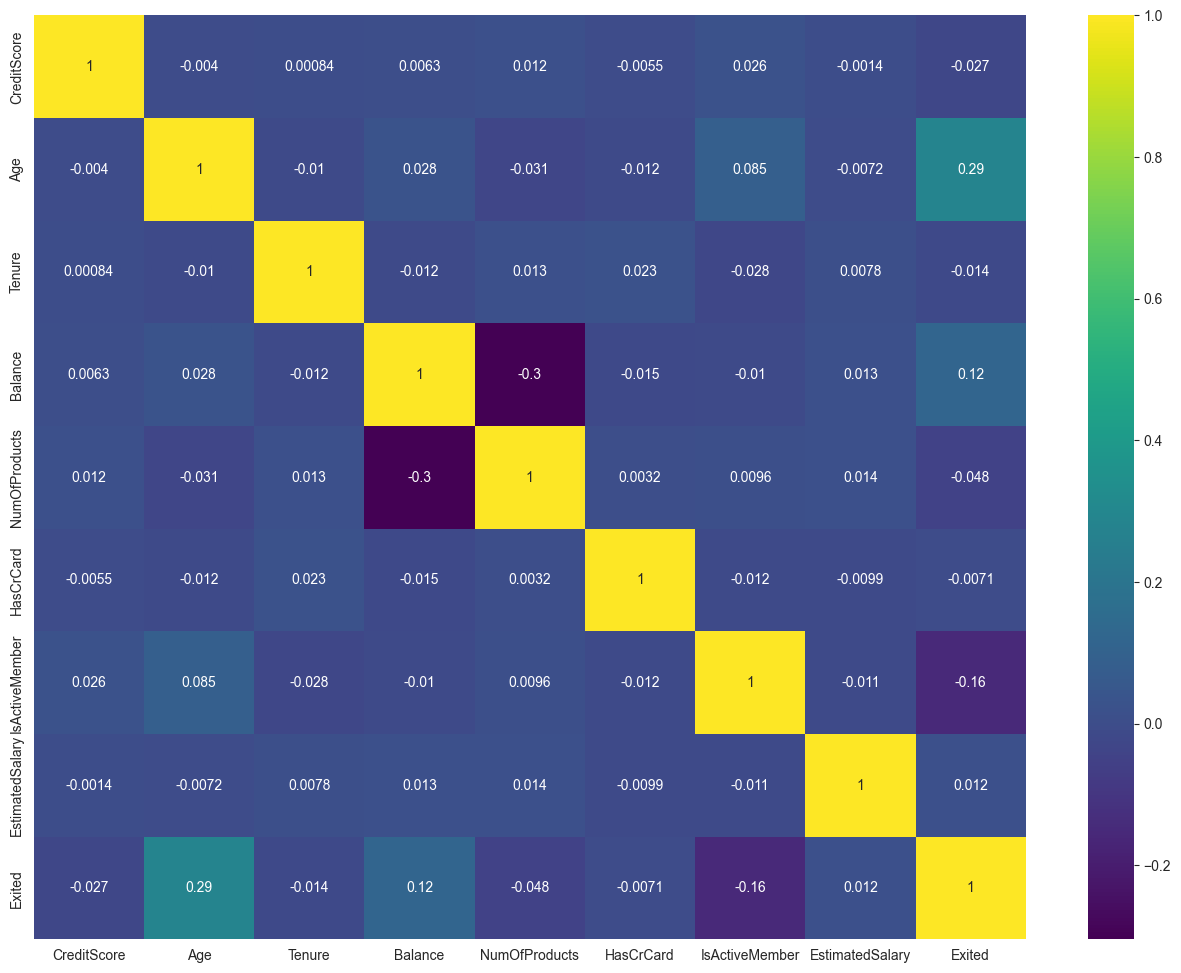

In [75]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap="viridis");

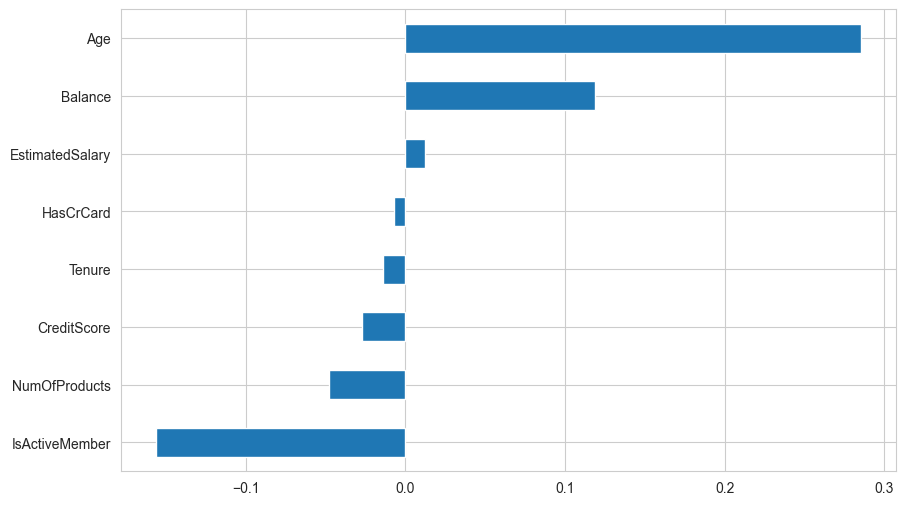

In [76]:
df.corr()["Exited"][:-1].sort_values().plot.barh();

In [77]:
df= pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [79]:
seed = 42

In [80]:
X = df.drop('Exited', axis=1)
y = df['Exited'].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.10, random_state = seed)

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam

In [85]:
X_train.shape

(9000, 11)

## without class_weigth

### Create The Model

In [86]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))  
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [87]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 128, epochs = 300, verbose=1)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.5725 - recall: 0.1047 - val_loss: 0.4889 - val_recall: 0.0000e+00
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4823 - recall: 0.0000e+00 - val_loss: 0.4595 - val_recall: 0.0000e+00
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4645 - recall: 0.0061 - val_loss: 0.4428 - val_recall: 0.0442
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4505 - recall: 0.0962 - val_loss: 0.4233 - val_recall: 0.1602
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4410 - recall: 0.1846 - val_loss: 0.4137 - val_recall: 0.2044
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4336 - recall: 0.1798 - val_loss: 0.4097 - val_recall: 0.1934
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4284 - recall: 0.2149 - val_loss: 0.4012 - val_recall: 0.3149
Epoch 8/300
64/64 [==========

64/64 [==============================] - 0s 2ms/step - loss: 0.3353 - recall: 0.4540 - val_loss: 0.3035 - val_recall: 0.4972
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3365 - recall: 0.4528 - val_loss: 0.3056 - val_recall: 0.5470
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3356 - recall: 0.4607 - val_loss: 0.3061 - val_recall: 0.5635
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3343 - recall: 0.4534 - val_loss: 0.3069 - val_recall: 0.5138
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3361 - recall: 0.4564 - val_loss: 0.3070 - val_recall: 0.5856
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3340 - recall: 0.4425 - val_loss: 0.3054 - val_recall: 0.4862
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3347 - recall: 0.4607 - val_loss: 0.3128 - val_recall: 0.5856
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.3227 - recall: 0.4782 - val_loss: 0.2975 - val_recall: 0.5691
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3219 - recall: 0.4970 - val_loss: 0.2987 - val_recall: 0.5470
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3220 - recall: 0.4994 - val_loss: 0.3032 - val_recall: 0.5414
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3225 - recall: 0.5036 - val_loss: 0.3014 - val_recall: 0.5138
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3224 - recall: 0.4831 - val_loss: 0.3049 - val_recall: 0.5414
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.4909 - val_loss: 0.3028 - val_recall: 0.5414
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3224 - recall: 0.4994 - val_loss: 0.3018 - val_recall: 0.5304
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3157 - recall: 0.5145 - val_loss: 0.3049 - val_recall: 0.6354
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3143 - recall: 0.5097 - val_loss: 0.3035 - val_recall: 0.5470
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3138 - recall: 0.5127 - val_loss: 0.3049 - val_recall: 0.5912
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3146 - recall: 0.5139 - val_loss: 0.3026 - val_recall: 0.5912
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3153 - recall: 0.5188 - val_loss: 0.3018 - val_recall: 0.5525
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3143 - recall: 0.5169 - val_loss: 0.3024 - val_recall: 0.5801
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3140 - recall: 0.5182 - val_loss: 0.3047 - val_recall: 0.5801
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3087 - recall: 0.5248 - val_loss: 0.3006 - val_recall: 0.5470
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3108 - recall: 0.5230 - val_loss: 0.2986 - val_recall: 0.5580
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3080 - recall: 0.5266 - val_loss: 0.3025 - val_recall: 0.5856
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3091 - recall: 0.5278 - val_loss: 0.3006 - val_recall: 0.5580
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3078 - recall: 0.5278 - val_loss: 0.3037 - val_recall: 0.5746
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3103 - recall: 0.5212 - val_loss: 0.3024 - val_recall: 0.5249
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3094 - recall: 0.5206 - val_loss: 0.3054 - val_recall: 0.6022
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.3056 - recall: 0.5242 - val_loss: 0.3065 - val_recall: 0.5691
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3051 - recall: 0.5278 - val_loss: 0.3084 - val_recall: 0.5801
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3047 - recall: 0.5321 - val_loss: 0.3089 - val_recall: 0.5359
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3059 - recall: 0.5254 - val_loss: 0.3024 - val_recall: 0.5414
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.3040 - recall: 0.5242 - val_loss: 0.3106 - val_recall: 0.5635


In [88]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 32)                384       
                                                                 
 dense_33 (Dense)            (None, 16)                528       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

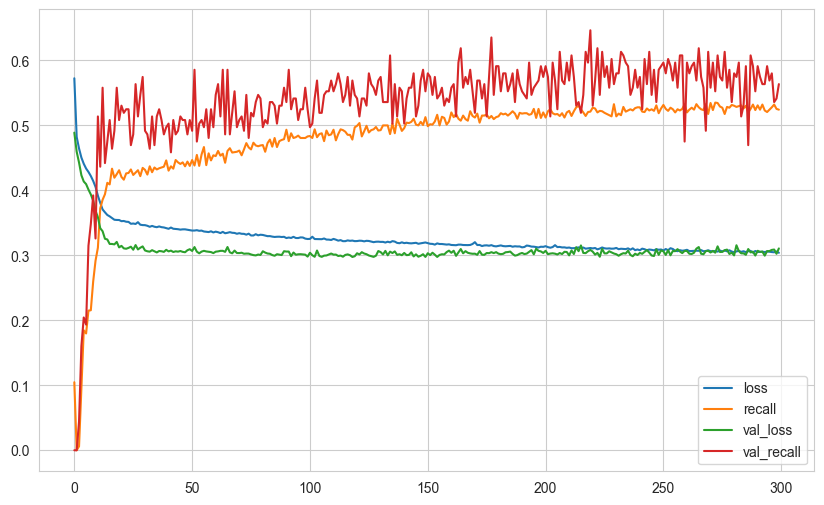

In [89]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [90]:
y_pred = model.predict(X_test) > 0.5  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[763  33]
 [113  91]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.73      0.45      0.55       204

    accuracy                           0.85      1000
   macro avg       0.80      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



In [93]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')            
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

32/32 [==============================] - 0s 1ms/step


NameError: name 'precision_recall_curve' is not defined

In [94]:
average_precision_score(y_test, y_pred_proba)

NameError: name 'average_precision_score' is not defined

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [95]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(32, activation = "relu", input_dim = X_train.shape[1]))  
model.add(Dense(16, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [97]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                  classes=np.unique(y_train),
                                                  y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6278777731268314, 1: 2.454991816693944}

In [98]:
model.fit(x=X_train,
          y=y_train,
          validation_split=.1,
          batch_size=128,
          epochs=300,
          verbose=1,
          class_weight=class_weights)

Epoch 1/300
64/64 [==============================] - 1s 5ms/step - loss: 0.6780 - recall: 0.4570 - val_loss: 0.6292 - val_recall: 0.5359
Epoch 2/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6397 - recall: 0.6059 - val_loss: 0.6038 - val_recall: 0.7238
Epoch 3/300
64/64 [==============================] - 0s 2ms/step - loss: 0.6139 - recall: 0.6689 - val_loss: 0.5762 - val_recall: 0.7182
Epoch 4/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5971 - recall: 0.6901 - val_loss: 0.5539 - val_recall: 0.7017
Epoch 5/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5866 - recall: 0.7052 - val_loss: 0.5496 - val_recall: 0.7017
Epoch 6/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5773 - recall: 0.7137 - val_loss: 0.4900 - val_recall: 0.6133
Epoch 7/300
64/64 [==============================] - 0s 2ms/step - loss: 0.5710 - recall: 0.7100 - val_loss: 0.5625 - val_recall: 0.7956
Epoch 8/300
64/64 [======================

64/64 [==============================] - 0s 2ms/step - loss: 0.4471 - recall: 0.7676 - val_loss: 0.4384 - val_recall: 0.8122
Epoch 61/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4481 - recall: 0.7700 - val_loss: 0.4530 - val_recall: 0.8177
Epoch 62/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4477 - recall: 0.7718 - val_loss: 0.4439 - val_recall: 0.8066
Epoch 63/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4457 - recall: 0.7839 - val_loss: 0.4263 - val_recall: 0.8011
Epoch 64/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4480 - recall: 0.7748 - val_loss: 0.4457 - val_recall: 0.8177
Epoch 65/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4448 - recall: 0.7778 - val_loss: 0.3868 - val_recall: 0.7790
Epoch 66/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4462 - recall: 0.7730 - val_loss: 0.4511 - val_recall: 0.8177
Epoch 67/300
64/64 [===========================

64/64 [==============================] - 0s 2ms/step - loss: 0.4345 - recall: 0.7809 - val_loss: 0.4079 - val_recall: 0.7845
Epoch 120/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4345 - recall: 0.7869 - val_loss: 0.4219 - val_recall: 0.7956
Epoch 121/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4352 - recall: 0.7863 - val_loss: 0.4410 - val_recall: 0.8066
Epoch 122/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4378 - recall: 0.7839 - val_loss: 0.3680 - val_recall: 0.7459
Epoch 123/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4383 - recall: 0.7797 - val_loss: 0.4075 - val_recall: 0.7790
Epoch 124/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4336 - recall: 0.7809 - val_loss: 0.4073 - val_recall: 0.7845
Epoch 125/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4346 - recall: 0.7893 - val_loss: 0.4094 - val_recall: 0.7790
Epoch 126/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4262 - recall: 0.7845 - val_loss: 0.4460 - val_recall: 0.8066
Epoch 179/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4207 - recall: 0.7881 - val_loss: 0.3941 - val_recall: 0.7569
Epoch 180/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4198 - recall: 0.7936 - val_loss: 0.4521 - val_recall: 0.8232
Epoch 181/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4202 - recall: 0.7990 - val_loss: 0.4380 - val_recall: 0.7901
Epoch 182/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4222 - recall: 0.7875 - val_loss: 0.3761 - val_recall: 0.7459
Epoch 183/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4194 - recall: 0.7875 - val_loss: 0.4317 - val_recall: 0.7956
Epoch 184/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4193 - recall: 0.7936 - val_loss: 0.4153 - val_recall: 0.7845
Epoch 185/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4103 - recall: 0.8027 - val_loss: 0.3940 - val_recall: 0.7403
Epoch 238/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4126 - recall: 0.7954 - val_loss: 0.4587 - val_recall: 0.8177
Epoch 239/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4109 - recall: 0.7966 - val_loss: 0.4455 - val_recall: 0.7956
Epoch 240/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4116 - recall: 0.7918 - val_loss: 0.4006 - val_recall: 0.7680
Epoch 241/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4095 - recall: 0.7984 - val_loss: 0.4117 - val_recall: 0.7901
Epoch 242/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4115 - recall: 0.7936 - val_loss: 0.3801 - val_recall: 0.7459
Epoch 243/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4100 - recall: 0.7960 - val_loss: 0.4704 - val_recall: 0.8232
Epoch 244/300
64/64 [====================

64/64 [==============================] - 0s 2ms/step - loss: 0.4052 - recall: 0.7996 - val_loss: 0.4523 - val_recall: 0.8232
Epoch 297/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4037 - recall: 0.7978 - val_loss: 0.4433 - val_recall: 0.8011
Epoch 298/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4054 - recall: 0.8015 - val_loss: 0.4062 - val_recall: 0.7735
Epoch 299/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4038 - recall: 0.8008 - val_loss: 0.3899 - val_recall: 0.7790
Epoch 300/300
64/64 [==============================] - 0s 2ms/step - loss: 0.4026 - recall: 0.7948 - val_loss: 0.4293 - val_recall: 0.7956


<AxesSubplot:>

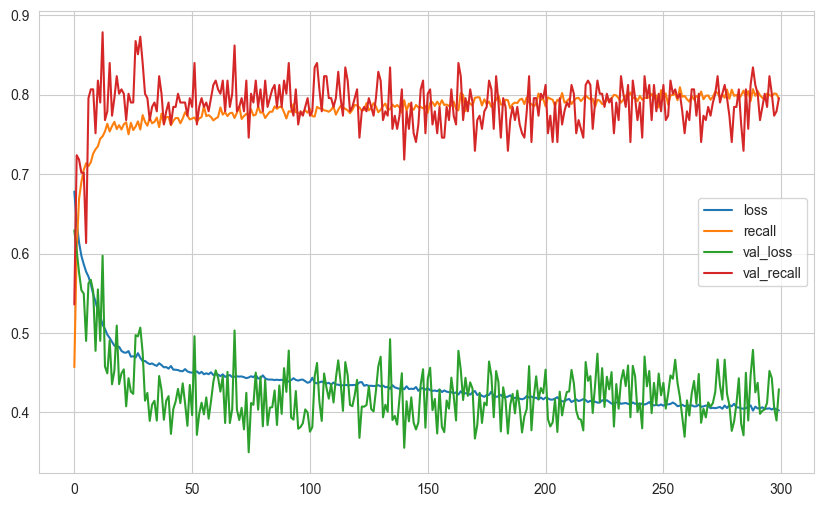

In [99]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [100]:
y_pred = model.predict(X_test) > 0.5  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 1ms/step
[[623 173]
 [ 44 160]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85       796
           1       0.48      0.78      0.60       204

    accuracy                           0.78      1000
   macro avg       0.71      0.78      0.72      1000
weighted avg       0.84      0.78      0.80      1000



In [ ]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')            
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [ ]:
average_precision_score(y_test, y_pred_proba)

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

### Add Dropout Layer

### Add Early Stop

#### Monitor the "val_loss" as metric

#### Monitor the "val_recall" as metric

## GridSearchCV

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

# Final Model and Model Deployment

## Prediction

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___